<a href="https://colab.research.google.com/github/HRS5020/Tensorflow/blob/main/FMNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Neural Network


*   CNN model with FMNIST dataset.
*   Experiments with number of filters, filter size, pooling size etc.
*   Implementing callbacks to stop training.


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Tensorflow verion = ", tf.__version__)

Tensorflow verion =  2.8.0


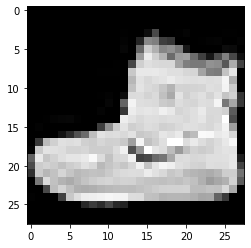

In [3]:
from matplotlib import cm
# load the dataset

fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# sample training data visualisation

index =0

np.set_printoptions(linewidth=320)
# check the raw data
# print(f'LABEL: {training_labels[index]}')
# print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index], cmap='gray')

In [5]:
# define the model 

def cnn_model(filter_no, filter_size, filter_activation, pooling_size):
    model = tf.keras.models.Sequential([
                                        # Add convolutions and max pooling
                                        tf.keras.layers.Conv2D(filter_no, filter_size, activation=filter_activation, input_shape=(28, 28, 1)),
                                        tf.keras.layers.MaxPooling2D(pooling_size),

                                        tf.keras.layers.Conv2D(filter_no, filter_size, activation=filter_activation),
                                        tf.keras.layers.MaxPooling2D(pooling_size),
                                        
                                        # Add the same layers as in DNN
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(128, activation='relu'),
                                        tf.keras.layers.Dense(10, activation='softmax')
                                        ])
    return model

model = cnn_model(32, (3,3), 'relu', (2,2))

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# Visualizing the Convolutions and Pooling

Let's explore how to show the convolutions graphically. The cell below prints the first 100 labels in the test set, and you can see that the ones at index `0`, index `23` and index `28` are all the same value (i.e. `9`). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the dense layer is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [6]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


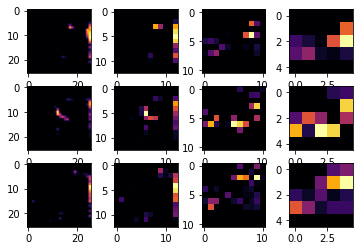

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [9]:
model_64 = cnn_model(64, (3,3), 'relu', (2,2))
model_64.summary()
model_64.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(f'\nMODEL TRAINING:')
model_64.fit(training_images, training_labels, epochs=5)

print(f'\nMODEL EVALUATION:')
test_loss = model_64.evaluate(test_images, test_labels)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [10]:
model_16 = cnn_model(16, (3,3), 'relu', (2,2))
model_16.summary()
model_16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(f'\nMODEL TRAINING:')
model_16.fit(training_images, training_labels, epochs=5)

print(f'\nMODEL EVALUATION:')
test_loss = model_16.evaluate(test_images, test_labels)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [11]:
model_128 = cnn_model(128, (3,3), 'relu', (2,2))
model_128.summary()
model_128.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(f'\nMODEL TRAINING:')
model_128.fit(training_images, training_labels, epochs=5)

print(f'\nMODEL EVALUATION:')
test_loss = model_128.evaluate(test_images, test_labels)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3200)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

Number of Filter --- Training acc ---- Test acc
-------------------------------------------------
*   16 ----- 0.8945 ---- 0.8736 
*   32 ----- 0.9105 ---- 0.8892
*   64 ----- 0.9064 ---- 0.8878
*   128 ---- 0.9068 ---- 0.8857

# Effect of epochs with 32 filters (3,3)


In [ ]:
for i in range(5,20,5):
    print('Epoch = {}\n'.format(i))
    # clear model session 
    tf.keras.backend.clear_session()
    
    model = cnn_model(32, (3,3), 'relu', (2,2))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(f'\nMODEL TRAINING:')
    model.fit(training_images, training_labels, epochs=i)

    print(f'\nMODEL EVALUATION:')
    test_loss = model.evaluate(test_images, test_labels)

    
    


Number of Epochs --- Training acc ---- Test acc
*   5 ----  0.9052 --- 0.8803
*   10 ---- 0.9259 --- 0.8937
*   15 ---- 0.9403 --- 0.8905

for more epochs, we run into model overfitting as we dont see as much inprovement in test acc compared to training acc.



# Experiment with pooling layers

In [19]:
for i in [2,4]:
    print('pooling size = ({}, {})\n'.format(i,i))
    # clear model session 
    tf.keras.backend.clear_session()
    
    model = cnn_model(32, (3,3), 'relu', (i,i))
    model.summary()
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(f'\nMODEL TRAINING:')
    model.fit(training_images, training_labels, epochs=5)

    print(f'\nMODEL EVALUATION:')
    test_loss = model.evaluate(test_images, test_labels)



pooling size = (2, 2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (Non

# implementing callback to stop training at 0.91 accuracy.

In [16]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy') >= 0.9): # Experiment with changing this value
#       print("\nReached 90% accuracy so cancelling training!")
#       self.model.stop_training = True



class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>=0.91):
            print("\nReached 91% accuracy so cancelling training!")
            self.model.stop_training = True


tf.keras.backend.clear_session()
model = cnn_model(32, (3,3), 'relu', (2,2))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=10, callbacks=myCallback())
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6169 - accuracy: 0.8212
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3483 - accuracy: 0.8731
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3086 - accuracy: 0.8876
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2788 - accuracy: 0.8956
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2564 - accuracy: 0.9060
Epoch 6/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.2410 - accuracy: 0.9117
Reached 91% accuracy so cancelling training!
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2409 - accuracy: 0.9117

MODEL EVALUATION:
313/313 [==============================] - 1s 4ms/step - loss: 0.3763 - accuracy: 0.8770
